## About Data
Netflix is a popular streming service that offer a vast catalog of movies, Tv shlow and original contents.This dataset is a cleaned verison of the original verison which can be found here. The data consist of contents added to netflix from 2008 to 2021. The oldset contaent is as old 1925 and the neweat as 2021. This dataset will be cleaned with postgerSQL and visualized with seaborn and matplotlib. The purpose of this dataset is to test my data cleaning and visualization skill. The cleaned data can be found below and the Tableau dashboard can be found here.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud

In [2]:
# load the data and show top five rows 
df = pd.read_csv('netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# show the shape data 
df.shape

(8790, 10)

In [4]:
# show the sample data top ten values 
df.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
3730,s5177,Movie,Mea Culpa,"Raúl Campos, Jan Suter",Mexico,11/10/2017,2017,TV-MA,54 min,Stand-Up Comedy
4467,s6205,Movie,Babam ve Oğlum,Çagan Irmak,Turkey,4/30/2018,2005,TV-14,112 min,"Dramas, International Movies"
1411,s1582,Movie,Super Monsters: Santa’s Super Monster Helpers,Steve Ball,United States,12/8/2020,2020,TV-Y,24 min,Children & Family Movies
698,s532,Movie,Rise: Ini Kalilah,"Saw Teong Hin, Nik Amir Mustapha, M.S. Prem Nath",Malaysia,7/6/2021,2018,TV-PG,101 min,"Dramas, International Movies"
823,s724,TV Show,The American Bible Challenge,Michael Simon,United States,6/15/2021,2014,TV-G,1 Season,Reality TV
4397,s6125,Movie,Alpha and Omega 2: A Howl-iday Adventure,Richard Rich,United States,10/1/2019,2013,TV-G,45 min,Children & Family Movies
872,s798,Movie,I Am Sam,Jessie Nelson,United States,6/2/2021,2001,PG-13,132 min,Dramas
4086,s5702,Movie,Interrogation,Vetrimaaran,India,12/1/2016,2015,TV-MA,116 min,"Dramas, International Movies, Thrillers"
4442,s6177,Movie,Anwar,Manish Jha,India,12/31/2019,2007,TV-14,134 min,"Dramas, Independent Movies, International Movies"
6048,s8220,Movie,The Bounty Hunter,Andy Tennant,United States,10/1/2019,2010,PG-13,111 min,"Action & Adventure, Comedies, Romantic Movies"


In [5]:
# check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
# check for missing values 
print('Show Missing values:',df.isnull().sum())

Show Missing values: show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
# check for duplicates values 
print('show Duplicates:',df.duplicated().sum())

show Duplicates: 0


In [8]:
# convert 'date_added' to datetime 
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
# show data type to confirm changes
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


In [10]:
# count the number of movies and tv show 
type_counts = df['type'].value_counts()

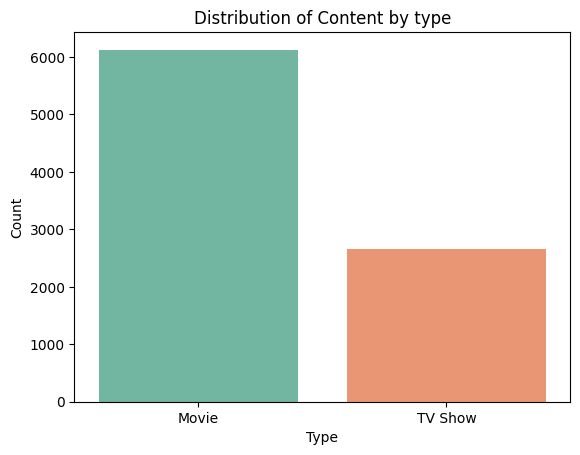

In [ ]:
# plot the distribution 
plt.Figure(figsize=(8,6))
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')
plt.title('Distribution of Content by type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

The chart highlights a clear dominance of `Movies over TV Shows` in the Netflix content library. With `over 6,000 movies` compared to approximately `2,500 TV shows`, it's evident that Netflix places a strong emphasis on film content. This skew suggests that the platform may be targeting users looking for quick, standalone viewing experiences rather than long-form series. However, the sizable number of TV shows also indicates a commitment to serialized storytelling, likely to retain viewers over longer periods. This distribution reflects a balanced content strategy, with a heavier tilt towards movies to cater to diverse viewing preferences.

In [12]:
# Split the 'listed_in' columns and count genres
df['genres'] = df['listed_in'].apply(lambda x : x.split(','))
all_agnres =sum(df['genres'],[])

In [13]:
genres_counts = pd.Series(all_agnres).value_counts().head(10)

In [14]:
genres_counts

 International Movies     2624
Dramas                    1599
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     773
 Independent Movies        736
 TV Dramas                 695
 Romantic Movies           613
Name: count, dtype: int64

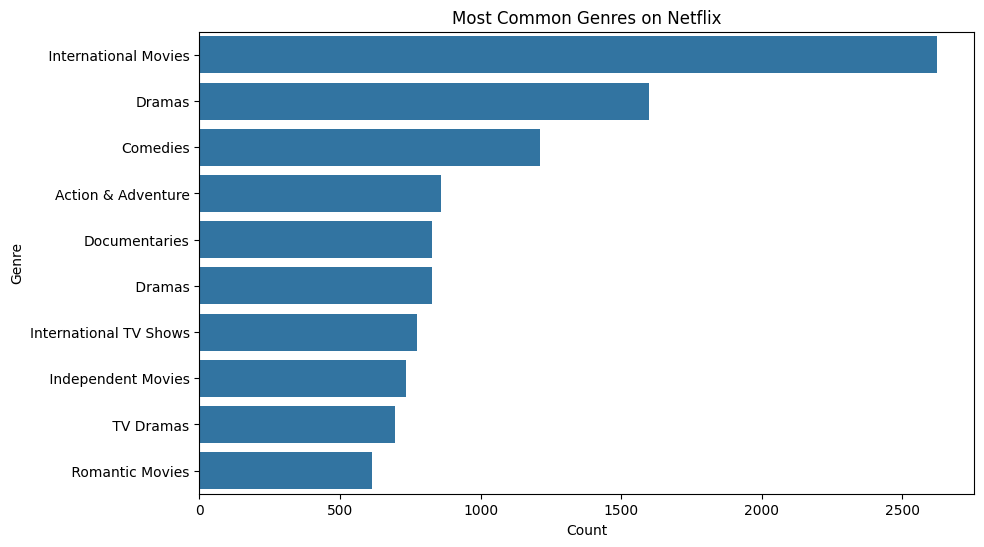

In [ ]:
# plot the most common genres 
plt.figure(figsize=(10,6))
sns.barplot(x=genres_counts.values,y=genres_counts.index)
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

- The visualization clearly show that `international Movies` dominate the genre landscape on Netflix with over `2,600 titles`,reflecting the platform's global content strategy and appeal to a diverse international audience.
- Following closely are `Dramas and Comedies`,indicating a strong viewe preference for emotionally engaging and entertaining content. Genres like `Action & Adventure,Documentaries`,and `indepandent Movies` also feature prominently showcasing the platform's effort to balance both mainstream and niche genre.
- Interstingly `Tv Dramas,International TV Show` and `Romantic Movies` appear lower on the list,suggesting either less content availability or more selective curation in those categories.
- Overall, this genre distribution highlights Netflix's fous on delivering a golbally inclusive,genre-diverse catalog,with a storng learning towards dramatic storytelling and international cinema.

In [16]:
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

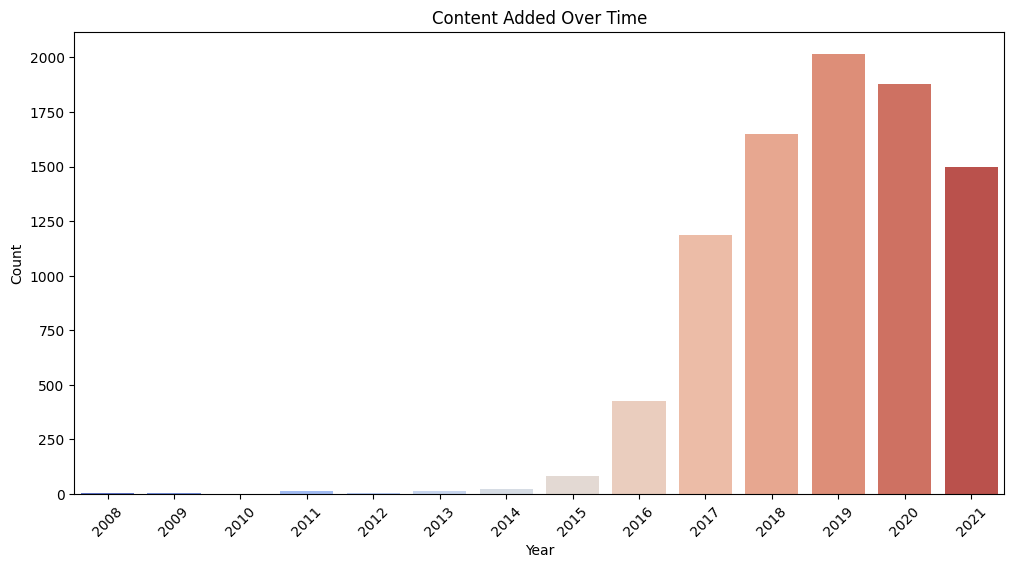

In [ ]:
# plot content added over the year 
plt.figure(figsize=(12,6))
sns.countplot(x='year_added',data=df,palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- The chart ilustrates a remarkable growth trajectory in the amount of content added to Neyf;ix from 2014 to 2019. Starting with nwgligible content additions before 2014. Netflix rapidly scaled its content library,with the most singifcant leap seen between 2016 and 2019,peaking at over 2,000 titlles in 2019.This period likely reflects Netflix's aggressive global expansion and insvestment in orignal productions.
- However,after 2019 the growth tapers slightly,with a decline in 2020 and 2021.This slowdown may be attributed to the covid-19 pandemic which disrupted production piplines worldwide.Desite the dip the content volume in these yeras still remains singificantly higher than the pre-2017 era.
- Overall the chat reflects Netflix's strategic shift from a streming distributor to a major content producer with a sharp focus on scling volume rapidly untli 2019,followed by a monderate stablization period.

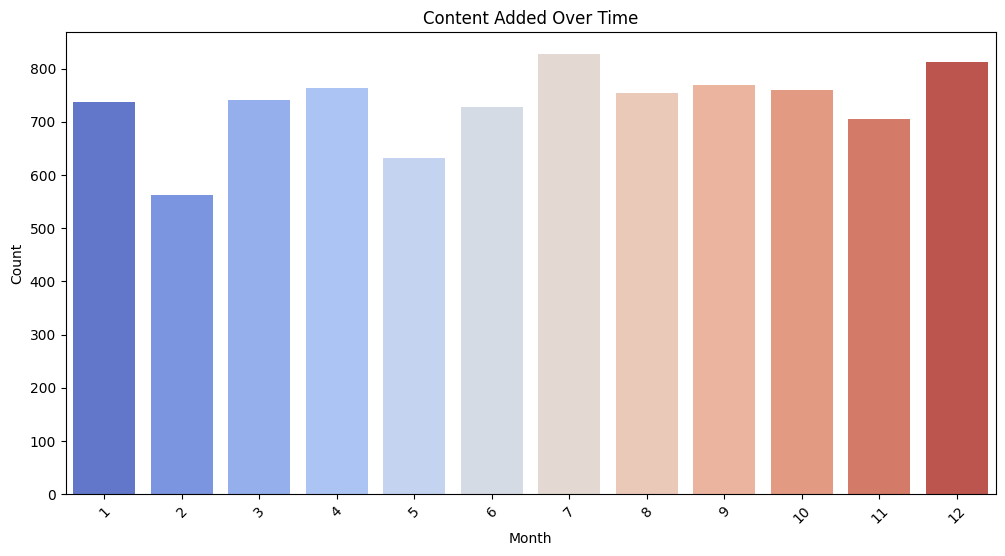

In [ ]:
# plot content added over the month 
plt.figure(figsize=(12,6))
sns.countplot(x='month_added',data=df,palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The data show a consistentent upward trend in countent addition throughout the year,with notable peaks in july and December.july record the `highest content valume`,possibly due to mid-year-initiatives or compaigns while December also shows surge likely influenced by end-of-year activities.i contrast,`Fabruary records the lowest contwnt addition potentially due to fewer working days.

In [19]:
# Count titles by director 
top_directord = df['director'].value_counts().head(10)

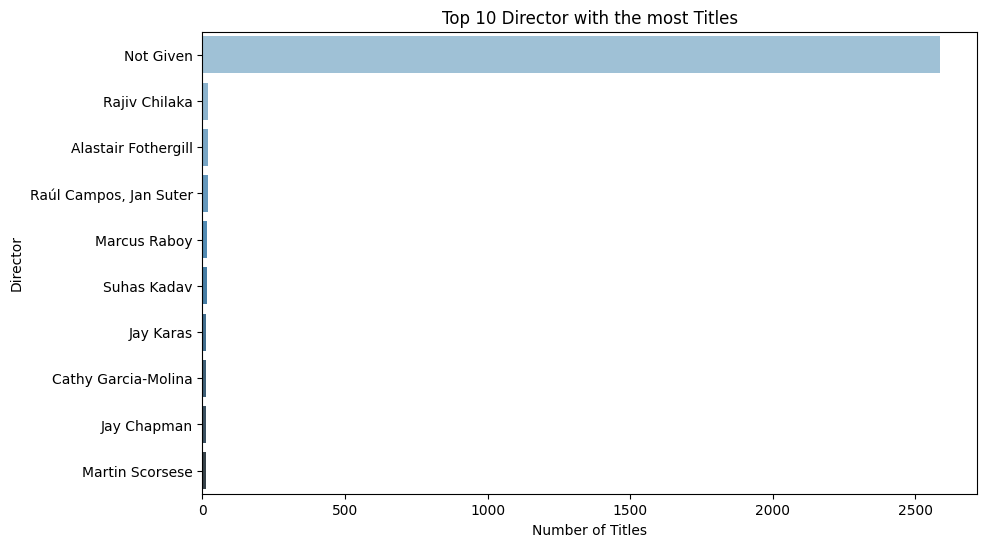

In [ ]:
# plot top Directors 
plt.figure(figsize=(10,6))
sns.barplot(x=top_directord.values,y=top_directord.index,palette='Blues_d')
plt.title('Top 10 Director with the most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

- The chart reveals that an overtwhelming number of Netflix titles-over2,500-do not have a diector listed,meakerd as 'Not Given'.This highlights a singnificant gap in metadata completeness, which can inpact content categorization recommendation algorithms and insights into directorial influence.
- Among the named director **Rajiv Chilaka** leads with the hightest number of titles,reflecting his storng presence in children's animated content paticulary from india.Other directors like **Alastair Fothergill** (known for nature documentaries) and **Marcus Raboy** (comedy specials) also appear frequently indeicating their specialization in specific content niches.
- Notably legendary filmmaker **Martin Scorsese** appears in the top 10 though with far fewer titlles than other -- a testament to the prominence of his work rather than quantity.
- This distribution suggests that while Netflix hosts work from many directors **a large portion of the content lacks clear attribution** especially for global or loder content,Enhancing metadata quality could imporove both **user discovery and data-driven** storytelling insights.

In [21]:
# Generate word cloud 
movie_titles = df[df['type']=='Movie']['title']
wordcloud = WordCloud(width=800,height=400,background_color='black').generate(' '.join(movie_titles))

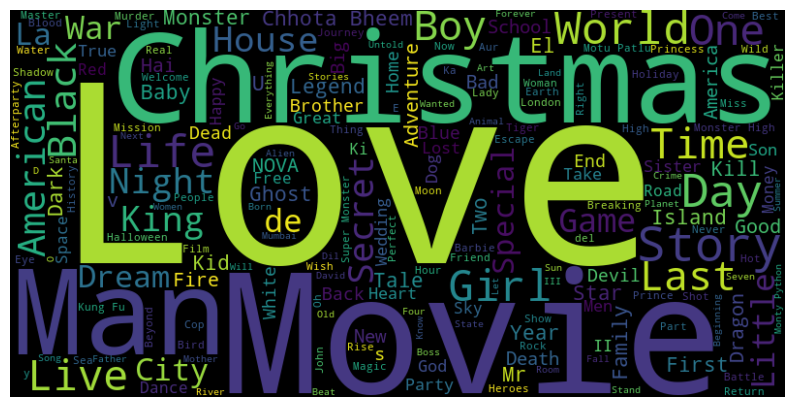

In [22]:
# plot word cloud 
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
# Extract top ten rating 
top_rating = df['rating'].value_counts().head(10)

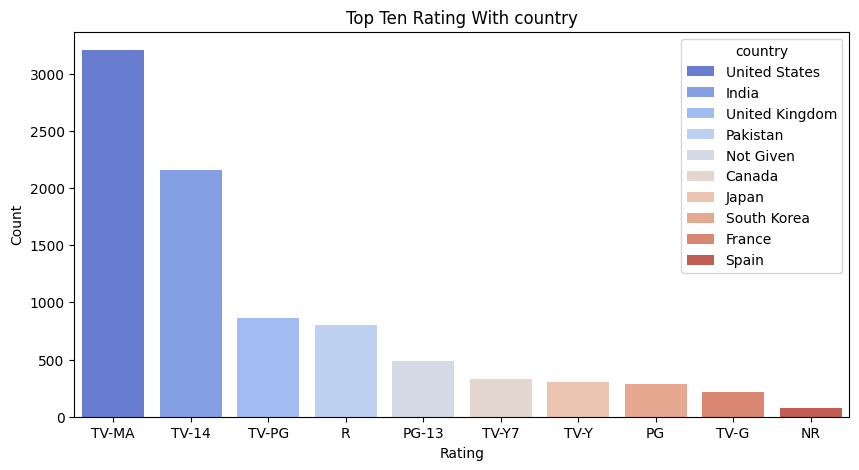

In [ ]:
# plot top ten rating with country
plt.figure(figsize=(10,5))
sns.barplot(x=top_rating.index,y=top_rating.values,palette='coolwarm',hue=df['country'].value_counts().index[:10])
plt.title('Top Ten Rating With country')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

- The chart highlights that the most prevalent rating category on Netflix is **TV-MA** (Mature Audience) with the highest contribution from the **United States** indicating a strong focus on adult-oriented content such as thrillers dramas and crime series.
- Following closely are **TV-14** and **TV-PG** mostly contributed by india and the **United Kingdom** suggesting a balanced offering of family-friendly and tenn-appropriate content in those markets.
- Ratings like **R,PG-13** and **TV-Y7** are moderately with contribution from **Pakistan,Canada,and japan** pointing toword a diverse mix of content maturity levels across regions.
- Interestingly the **Not Given and NR** (Not Rated) categories still represnt a mesurable portion suggesting metadata or internationl content with non-standard classifications.
- This distribution cleaely reflects Netflix's **Global strategy** which combines mature western programming with regional culturally tailored content aimed at broader family and youth audiences.It also emphasizes Netflix's leadership in **pushing boundaries in adult content** while still catering to a global mixed-age subscriber base.

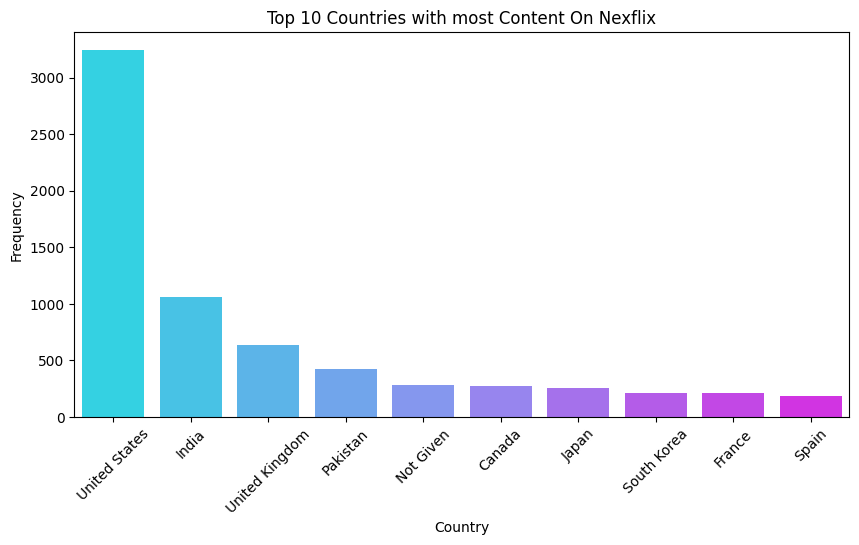

In [ ]:
# plot  Top 10 countries
plt.figure(figsize=(10,5))
sns.barplot(x=df['country'].value_counts().index[:10],y=df['country'].value_counts()[:10],palette='cool')
plt.title('Top 10 Countries with most Content On Nexflix')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


- The chart clearly shows that the **Unied States** is the **undisputed leader** in Netflix content productin contribution over 3,000 titles which is more than times the volume from the next hightest country. This dominance reflects Netflix's origin and largest subscriber base in the U.S,along  with its heavy investment in American productions.
- India hold the second position with over 1,000 titles highlighting its growing importance inn Netflix's global.This redlects the company's focus on the rapidly expanding indian market including regional content and Bollywood productions.
- The **Unted Kingdom** and **Pakistan** follow showcasing strong contribution from English-language and South Asian content.Other notable contribution include **Canada,japan,South Korea,France and Spain** which represent a mix of western and asian entertainment industries and their increasing influence on global streaming platforms.
- Interestingly a singfiicant portion of content is labeled **Not Given** which suggests missing metadata and an opportunity for Netflix to improve its catalog's classification.
- Overall the chart demonstrates Netfix's **divers international content catalog** with a strong Western foundaion and growing emphasis on Asian and European markets,aligning with its global expansion goals. 

In [40]:
# extract top 10 watch movies and tv show 
top_10_movies_watch  = df[df['type']=='Movie'].groupby('country')['year'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]
top_10_tvshow_watch = df[df['type']=='TV Show'].groupby('country')['year'].value_counts().reset_index().sort_values(by='count',ascending=False)[:10]

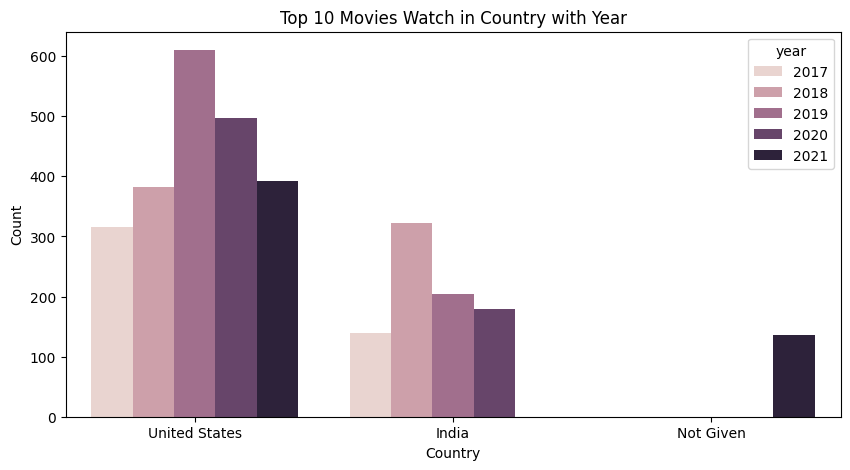

In [ ]:
# plot the top 10 country watchs movies
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='count',hue='year',data=top_10_movies_watch)
plt.title('Top 10 Movies Watch in Country with Year')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


>The chart reveals a clear trend of movies consumption on Netflix in the United States and india between 2017 and 2021.
- **United States** dominates movies viewing consistently across all years with a **Notable peak in 2019** reaching over **600 Movies** watched. This spike likely reflects the boom in steraming popularity and Netflix ramp-up of original releases that year.
- Past-2019 there's a slight decline in 2020 and 2021 possibly due to shifts in viewer behavior during the pandemic or increased compettion other platforms.
- In india show significant growth from 2017 to 2019 peaking in 2019 as well then experiencing a gradual decline.Still the volume remains substantials confirming india as a key emergig matket for Netflix.
- The **Not Give** category only appears in 2021 suggesting some meatdata inconsistency or a new content origin classification method introduced that year.
- Overall the data underscores the **United States'stronghold** in Netflix viewership while also highlighting **india's growing role** in content consumption.The shared 2019 peak suggests that was a **landmark year** for Netflix golbally before the pandemic interduced shift in both production and conumption trends.

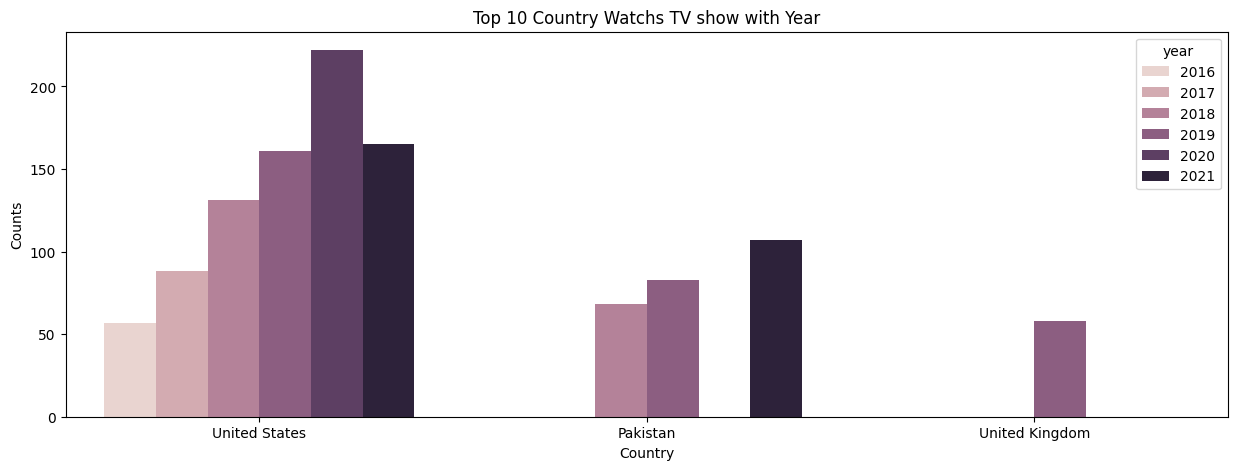

In [ ]:
# plot the top 10 country watchs tv show
plt.figure(figsize=(15,5))
sns.barplot(x='country',y='count',hue='year',data=top_10_tvshow_watch)
plt.title('Top 10 Country Watchs TV show with Year')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.show()

> This chart highlights a **muti-year-ternd** in tv show viewreship on Netflix segmented by country from 2021:

- Us ** United State** emerges as the **Leading country** in TV show cousumption.Viewership consistently grew year over year,peaking in 2020 with over 220 shows before experiencing a modest decline in 2021.The growth from 2016 to 2020 reflects the increasing popularity of seralized content like deamas aand reality Tv among American audiences.
- Pakistan show a late but meaningful entry with visible activity starting in 2018 gradully increasing until 2021.The steep rise in 2021 singals rapid adopiton of streaming services and greater localization of Nstflix content in the pakistan market.
- United Kingdom appears only for the year 2019 indicating that while there in some notable engagement.It's either limited in data or overshadowed by other market.It may also point to data limitation or category overlaps with co-productions.

In [27]:
# make a new cloumns by year,month,day 
df['year'] =df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day

In [28]:
# extract monthly movies and tv shows 
monthly_movies_release = df[df['type']=='Movie']['month'].value_counts().sort_index()
monthly_series_release = df[df['type']=='TV Show']['month'].value_counts().sort_index()

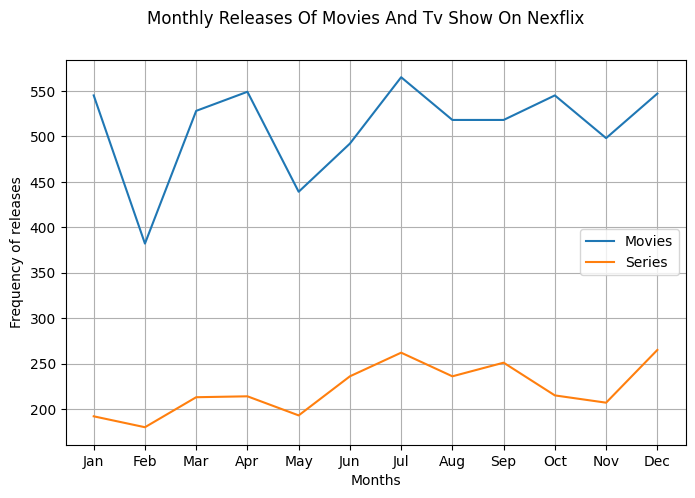

In [ ]:
# plot mothly movies and tv shows
plt.figure(figsize=(8,5))
plt.plot(monthly_movies_release.index,monthly_movies_release.values,label='Movies')
plt.plot(monthly_series_release.index,monthly_series_release.values,label='Series')
plt.xlabel('Months')
plt.ylabel('Frequency of releases')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.grid(True)
plt.suptitle('Monthly Releases Of Movies And Tv Show On Nexflix')
plt.show() 

> This line graph presents a comparative view of how Netflix releases content-Movies vs.TV Show-across the 12 Months of a year.

#### **Movies:**
- Movies dominate the content release calender,with consistently higher release frequencies than TV series.
- peak mocie releases occur in july (Highest) followed by April,March and December each exeeding 540 titles.
- A notable dip appears in Fabruary and May indicating possible seasonal production or strategic content scheduling around holiday and viewership terends.

#### **TV Series:**
- Tv series releases are relativaly steady,randing mostly between 180 to 270 titlrs per month.
- The highest volume of series releases happend in july and december likey aligning with holiday seasons and binge watching trends.
- The lowest point for series releases is in Fabruary,mirroring the dip seen in movie releases.

#### **Key Insight:**
- Netflix appears to strategically cluster high-volume releases in month where user engagement may be higher-such as mid-year and yera-end holidays.
- Ehile movies see large fluctuation TV show have a moer stable  monthly release pattern suggesting a continuos content flow to keep subscribers engaged.

In [30]:
# extract movies and tv show by years 
year_movie_releases = df[df['type']=='Movie']['year'].value_counts().sort_index()
year_series_releases = df[df['type']=='TV Show']['year'].value_counts().sort_index()

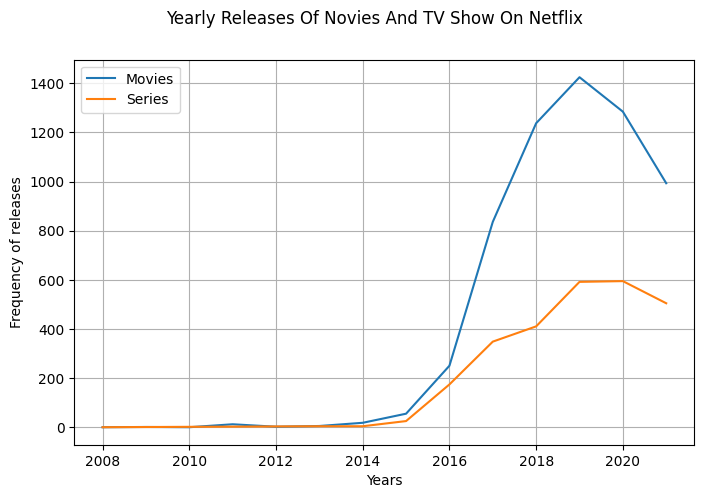

In [ ]:
# plot releases movies by years and tv show releases by year 
plt.figure(figsize=(8,5))
plt.plot(year_movie_releases.index,year_movie_releases.values,label='Movies')
plt.plot(year_series_releases.index,year_series_releases.values,label='Series')
plt.xlabel('Years')
plt.ylabel('Frequency of releases')
plt.grid(True)
plt.suptitle('Yearly Releases Of Novies And TV Show On Netflix')
plt.legend()
plt.show()

>This line graph liustrates the trend in yealy content addition on netflix for both Movies and Tv series form 2008 to 2021.

#### **Movies:**
- Netflix's movies releases surged dramatically from 2016 to 2019 with a sharp jump from under 300 in 2016 to over 1400 in 2019.
- The peak year for movie releases was 2019.
- A slight decline is observed in 2020 and 2021 likely due to global disuption(e.g,COVID-19 pandemic impacting production and distribution).

#### **TV Series:**
- A similar growth pattern is seen in series releases but at a more moderate pece.
- Series releases began increasing singficantly after 2015 peaking around 2019-2020 at about 600 title.
- There is a small drop in 2021 indicating possible production bottenecks or a shift in strategic content investments.

#### **Key Observations:**
- Post-2015 growth reflects Netflix's global expansion aggressive investment in original and regional content.
- MOvies dominate in volume but TV series maintain a consistent and growing presence especially post-2016.
- The dip post-2019 in both categories colud be strategic (More quality over quanity) or logistical (pandemic effects).

In [32]:
# Top Ten Popular Genres 
popular_monies_genre = df[df['type']=='Movie'].groupby('listed_in').size().sort_values(ascending=False)[:10]
popular_series_genre = df[df['type']=='TV Show'].groupby('listed_in').size().sort_values(ascending=False)[:10]

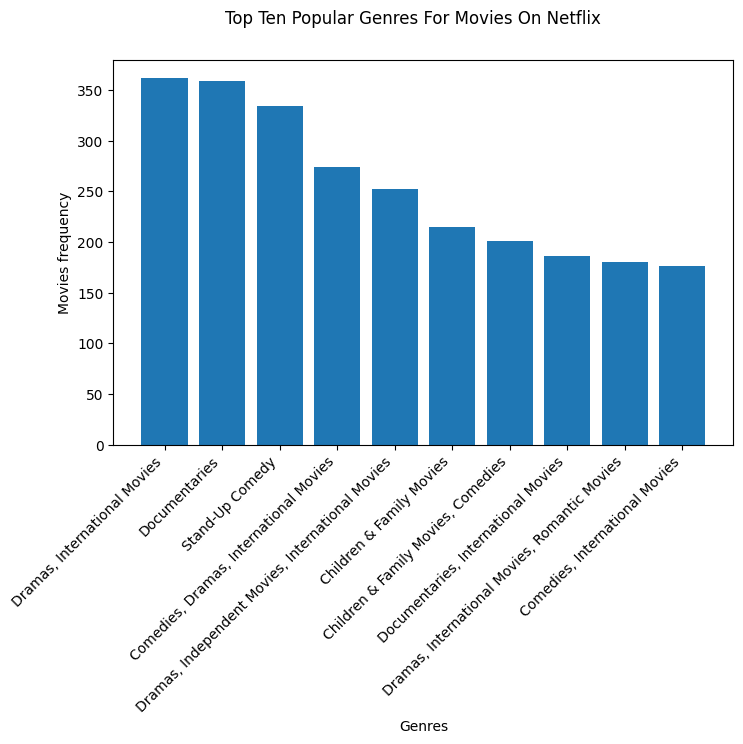

In [ ]:
# plot top 10 movies genres
plt.figure(figsize=(8,5))
plt.bar(popular_monies_genre.index,popular_monies_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('Movies frequency')
plt.suptitle('Top Ten Popular Genres For Movies On Netflix')
plt.show()

> This bar chart showcase the ten most frequently occuring genres for movies avaiable on Netflix,highlighting viewer preferences and Netflix's content strategy.

#### Key Observation:
1. #### **Dramas international Movies**
    - most dominat genre combination
    - Reflects Netflix's foucs on emotinally engaging storis with global appeal
2. #### **Documenntaries**
    - Almost tied with top genre indicating a strong demand for real-word, informative content.
    - Suggests growing intwrwst in non-flction storytelling.
3. #### **Stand Up Comedy**
    - A surprising third showcasing Netflix's success in produing and hosting original comedy specials.
4. #### **Comedies,Dramas,International**
    - Blending humor with storytelling again tied to global themes-shows preference for relatble and divers narratives.
5. #### **Independent international Dramas**
    - Niche yet popular indicating that audiences are engaging with indie flims that offer unique and diverse perspectives.
6. #### **Children & Family Movies**
    - With two separate entries in the top 10 this genre proves vital in family friendly content strategy.
7. #### **Romantic Comedic Titles (Rom-Coms)**
    * These genre appeal to wide demographics with sutained popularity across matkets.

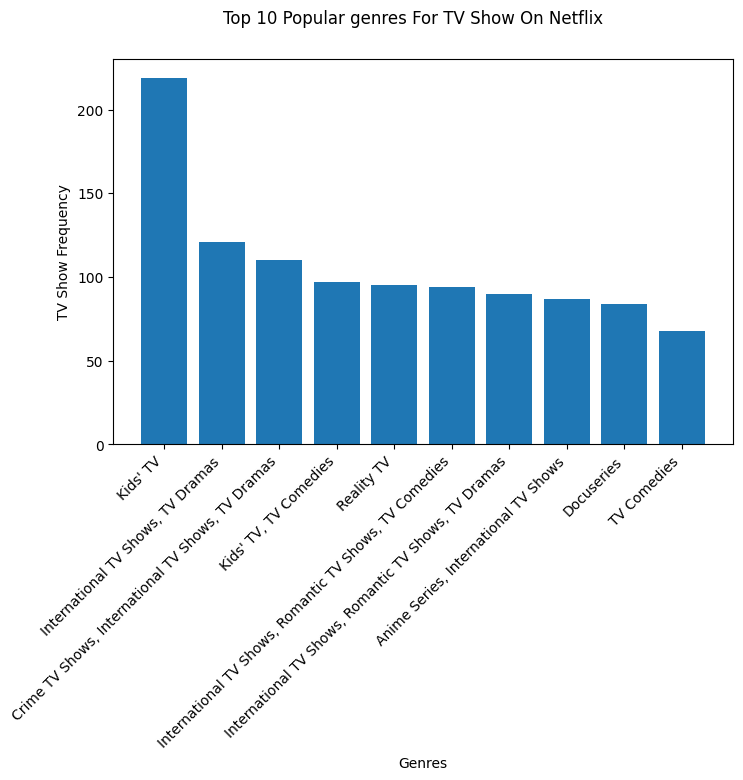

In [ ]:
# plot popular top 10 series genres
plt.figure(figsize=(8,5))
plt.bar(popular_series_genre.index,popular_series_genre.values)
plt.xticks(rotation=45,ha='right')
plt.xlabel('Genres')
plt.ylabel('TV Show Frequency')
plt.suptitle('Top 10 Popular genres For TV Show On Netflix')
plt.show()

> Here are the key points noted line by line from the bar chart:
1. Kids Tv is the most popular genre on Netflix with the hightest show frequency (over 200 shows)
2. Internationl TV Dramas and Crime or Internationl Dramas are the next most popular genre.
3. Comedy genre like Kids TV comedies also appere in the top 10 showing demand for light entertainment.
4. Reality Tv and Docuseries maintain steady popularity,indecating in non-fiction content.
5. Genre with combined like internationl Tv show or Romantic or Drama show that multi-genre content is well recevied globally.
6. Anime series combine with internationl tv show are also in the 10 reflecting the global rise of anime popularity.
7. Overall the chart highlights a diverse genre preference on Netflix with storng focus on kids,international,drama and comedy content.

In [35]:
# Top 20 driector extract 
director = df['director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:20]

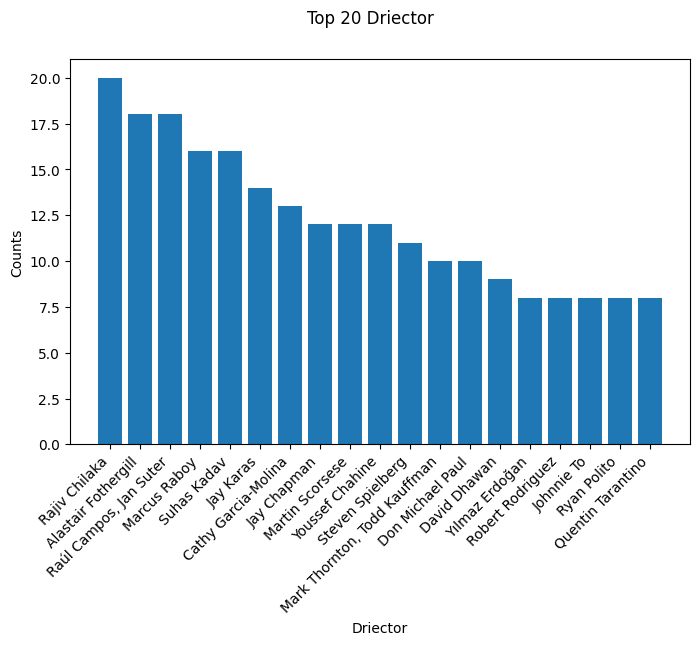

In [ ]:
# plot top 20 driector 
plt.figure(figsize=(8,5))
plt.bar(director['director'],director['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel('Driector')
plt.ylabel('Counts')
plt.suptitle('Top 20 Driector')
plt.grid(False)
plt.show()

> Key insights - Top 20 Driectors on Netflix
1. Rajiv Chilaka tops the list with 20 show,inducating a major contribution to Netflix's content-likely chidern's or animated shows.
2. Alastair Fathergill and Raul Campos Jan Sutar are tied for the second-highest number of dircted shows (18 each),suggesting storing involvement in documentaries or series.
3. Marcus Raboy,Suhas Kadav and Jay Karas have directed 16-17 shows,showing consistent output in comedy or regional content.
4. Cathy Garcia-Molina and Jay Chapman contributute heavily,hinting at regional or romantic genre dominance.
5. Renowned global filmmakers like Martin Scorsese,Steven Spieberg and Quentin Tarantion are present but lower in count-showing Netflix has fewer of their titles but hoght-profile ones.
6. Driector such as Youssef Chahine Todd Kauffman and Wimzie to reflect Netflix's global and genre-diverse reach (e.g. Middle Eaten,animation,or experimantal work).
7. Consistent presence of indian directors (Rajiv Chilaka,Suhas Kadav,David Dhawan) shows Netflix's regional insvestment in india content.
8. Diversity of names highlights a mix of global legends,regional strat and niche director,giving Netflix a broad content base.

In [37]:
# Top 20 movies and Tv show Duration 
duration_movies=df[df['type']=='Movie']['duration'].value_counts().sort_values(ascending=False)[:20]
duration_tv_show=df[df['type']=='TV Show']['duration'].value_counts().sort_values(ascending=False)[:20]

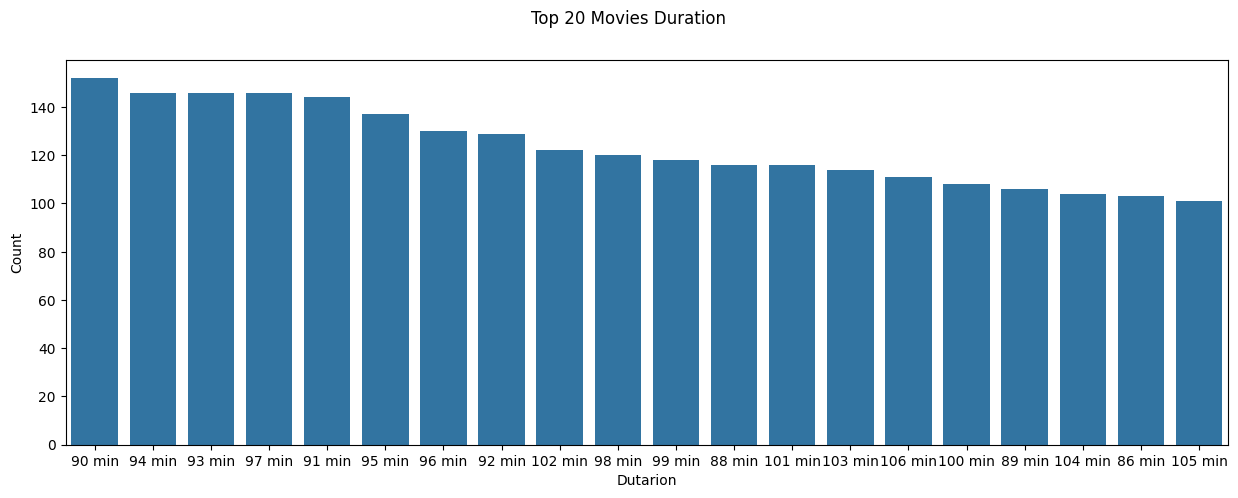

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=duration_movies.index,y=duration_movies.values)
plt.xlabel('Dutarion')
plt.ylabel('Count')
plt.suptitle('Top 20 Movies Duration')
plt.show()

> Key points - Top 20 Movies Duration On Netflix:
1. 90 Minutes is the most common movies duration with the hightest count (over 150 movies),indecating that it is ideal or preferred lenght of filmmakers and viewers.
2. Duations between 90 to 97 minutes dominate the list suggesting that most Netflix movies aim for a concise under-100-minute runtime.
3. popular duration such as 94,93,97,and 95 minutes are very close in count,hightlight a narrow band for majority of flims.
4. As the runtime increses beynod 100 minutes the count of movies gradually dropa.
5. Longer flims (104-106 min) appear less frequently imaplying a viwewer preference or platform strategy shorter content.
6. Very short durations like 86,88,89 minutes still make the top 20 showing that sub-90-minute films are also widely acceted.
7. The chart reflects that Netflix havliy favors mivies between 86 to 106 minutes with a sweet spot sround 90-95 minutes.
8. This pattern supports the idea attention span-watching habits and platform effciency drive potimal lengths.

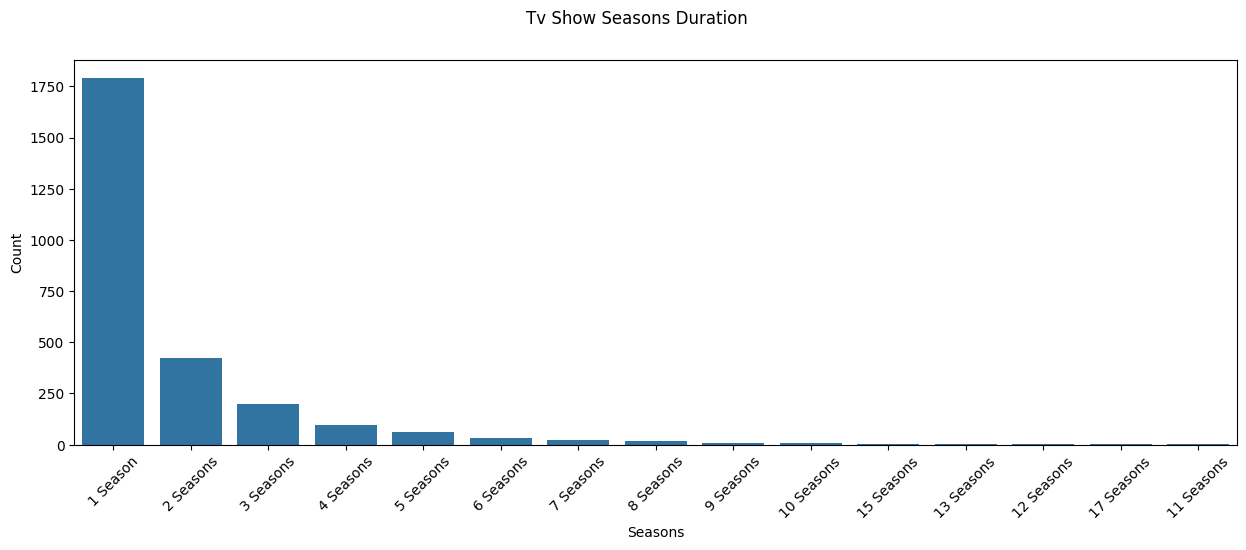

In [ ]:
# plot top 20 seasons and Duration  
plt.figure(figsize=(15,5))
sns.barplot(x=duration_tv_show.index,y=duration_tv_show.values)
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.suptitle('Tv Show Seasons Duration')
plt.xticks(rotation=45)
plt.show()

> Netflix TV show Seasons
1. Season shows dominate the platform with over 1,750 entries clearly showing Netflix's preference or trend toword limited series or short-term productions.
2. Season show nwtx but at a much lower count (450),indicating a steep drop after the first season.
3. The number of show countinues to decrease steadily from 3 to 4 season sugggesting thta only a few are extended beyond 2 season.
4. Long-running show (6+ season) are very rare on Netflix with wach additionnal season seeing significantly fewer show.
5. The platform has minimal show with  10 or more season highlighting that Netflix doesn't typically host or create long-durations series.
6. Show with 15,17 or more season are exceptional cases,likely classic or syndicated content (e.g.older broadcast TV acquisitions).
7. The data clearly reflects Netflix's strategic emphasis on short-format TV content, possibly due to viewer retention bingeability,and content rotation needs.
8. Audience behavior and production costs may influenece the low count of multi-season shows driving createoes and netflix to wrap up stories early.